<a href="https://colab.research.google.com/github/Amankr351/Play-Store-Review-Analysis/blob/main/Aman_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Play Store Review Analysis...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing all the required libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Play Store Data.csv', encoding = 'ISO-8859-1')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data preparation and cleaning



In [4]:
data.shape   #The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

(10841, 13)

In [5]:
data.info()   #The info() method prints information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()  #To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data['Type'].fillna('Free', inplace = True)               #After filling the value we can check and see if that has been correctly placed.
data['Content Rating'].fillna('Everyone', inplace = True)

In [8]:
data['Rating'].fillna(data['Rating'].mode()[0], inplace = True)

In [9]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [10]:
data.drop(['Current Ver', 'Android Ver'], axis=1, inplace=True)   #We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.

In [11]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated'],
      dtype='object')

In [12]:
data.describe()   #The describe() method returns description of the data in the DataFrame.

,Rating
count,10841.000000
mean,4.221437
std,0.504555
min,1.000000
25%,4.100000
50%,4.400000
75%,4.500000
max,19.000000


##Exploratory analysis and visulization

###Top categories on Google Playstore?

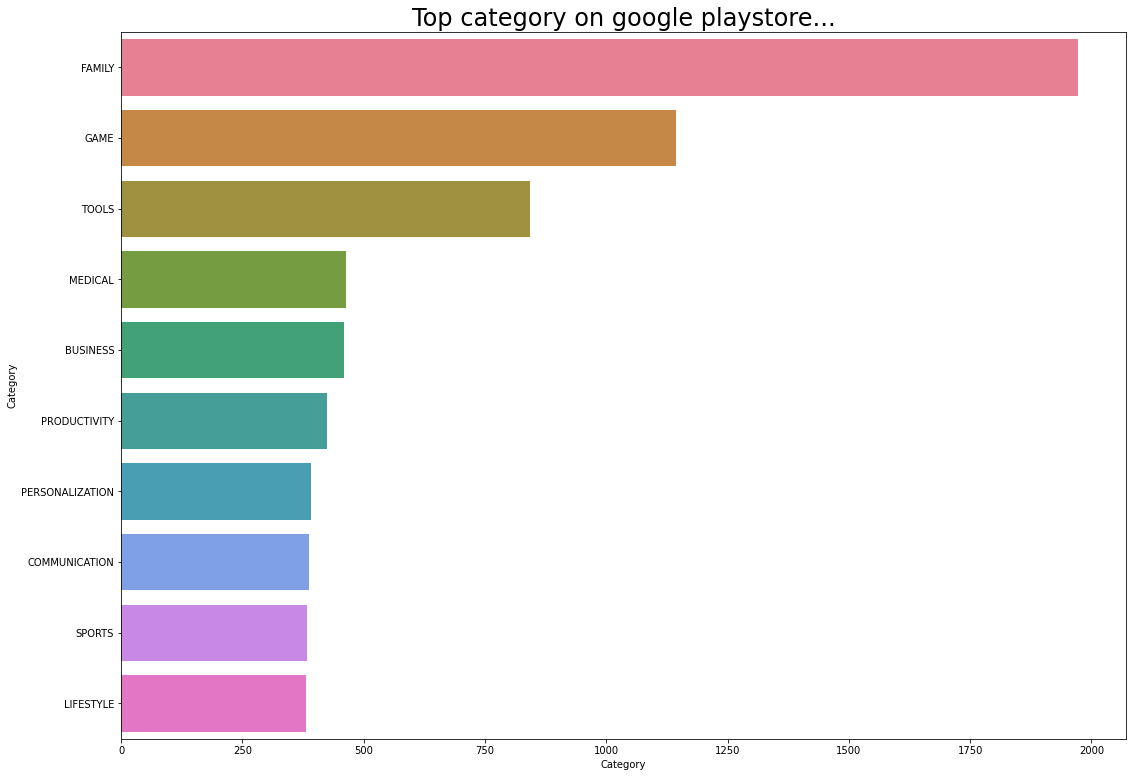

In [13]:
y = data['Category'].value_counts().index
x =  data['Category'].value_counts()

plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")
sns.barplot(x=x[0:10],y=y[0:10], palette='husl')                   ##Top 10 categories on Google Playstore.
plt.title("Top category on google playstore...", fontsize = 24);

From the above plot, we can come to the conclusion that in the play store most of the apps are under FAMILY, GAME, TOOLS and MEDICAL category.

###Which category of Apps from the ‘Content Rating’ column is found more on the play store?

In [14]:
x2 = data['Content Rating'].value_counts().index
y2 = data['Content Rating'].value_counts()

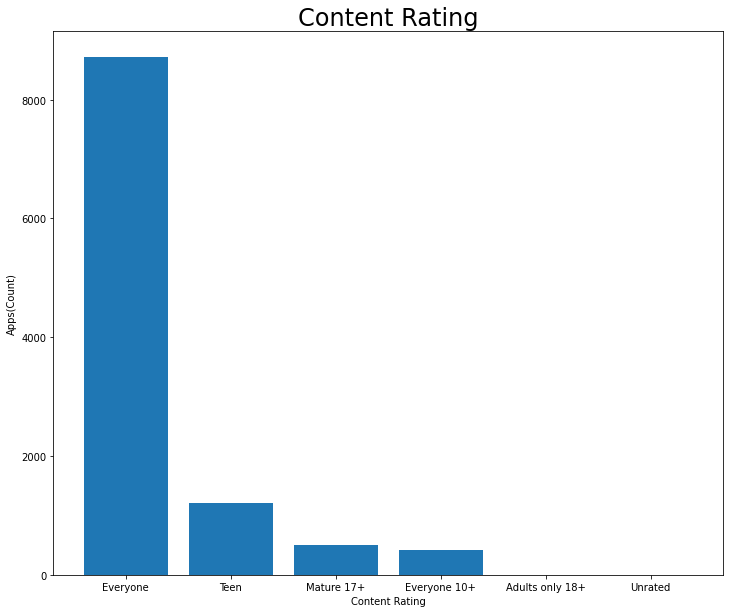

In [15]:
plt.figure(figsize=(12,10))
plt.bar(x2, y2, width =0.8)         #Content rating.
plt.ylabel('Apps(Count)')
plt.xlabel('Content Rating')
plt.title('Content Rating', size = 24);

From the above plot, we can see that the Everyone category has the highest number of apps.

###What percentage of apps are Free and Paid?

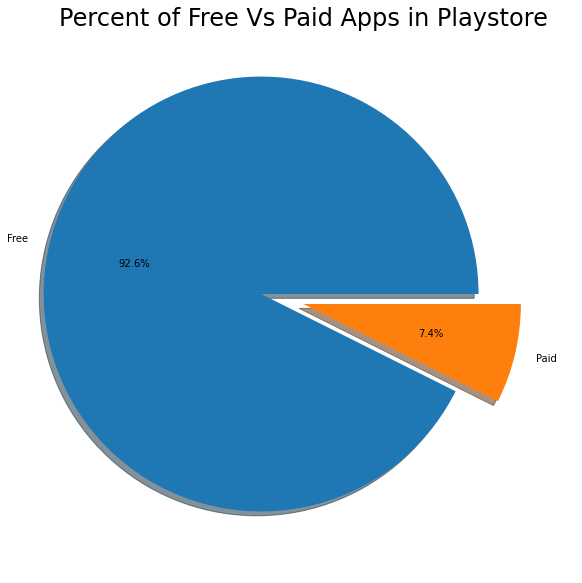

In [32]:
plt.figure(figsize=(10,10))
labels = data['Type'].value_counts(sort = True).index        #Free vs Paid
sizes = data['Type'].value_counts(sort = True)
myexplode = [0.2, 0]
plt.pie(sizes,  labels=labels, explode =myexplode, autopct='%1.1f%%', shadow=True)
plt.title('Percent of Free Vs Paid Apps in Playstore', size = 24);

 From the above graph, we can see that 93%(Approx.) of apps in the google play store are free and 8%(Approx.) are paid.

###Distribution of the ratings of the apps?

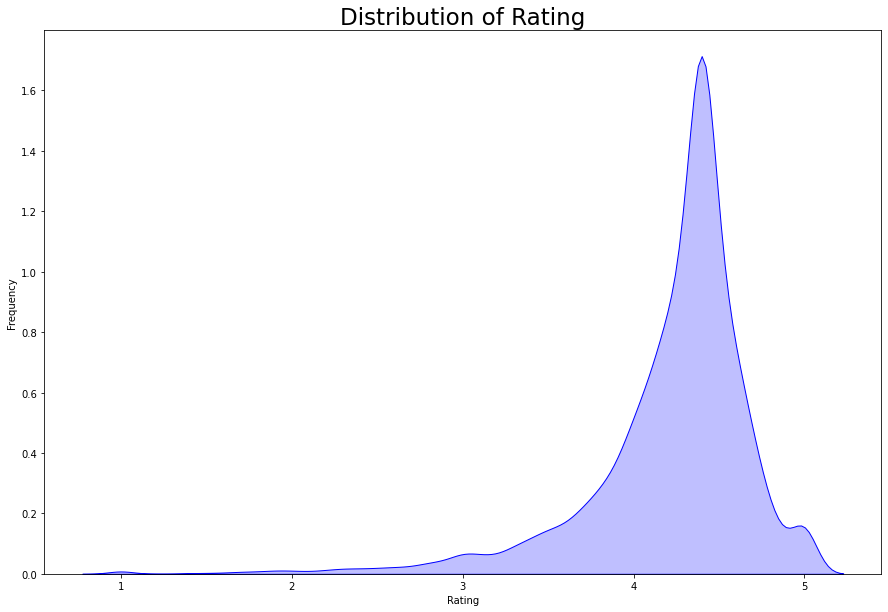

In [30]:
plt.figure(figsize=(15,10))
plt.xlabel('Rating')                #Let’s have a look at the distribution of the ratings of the data frame.
plt.ylabel('Frequency')
sns.kdeplot(data.Rating, color= 'Blue', shade=True)
plt.title('Distribution of Rating', size = 23);

From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8.

In [18]:
data.drop([10472], axis=0, inplace=True)            #To drop a row or column in a dataframe, we need to use the drop() method available in the dataframe.
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


###Which category of apps has the most number of installs?

In [19]:
#To convert this column from object to integer type. First of all, we will need to remove the + symbol from these values.
data['Installs'] = data.Installs.apply(lambda x: x.strip('+'))
data['Installs'] = data.Installs.apply(lambda x: x.replace(',', ''))    #let’s remove the , symbol from the numbers.
data['Installs'] = pd.to_numeric(data['Installs'])          #Lastly, we can now convert it from string type to numeric type.

In [20]:
highest_Installs_df = data.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)   #Number of Installs per category.
highest_Installs_df

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915
FAMILY,10258263505
PHOTOGRAPHY,10088247655
NEWS_AND_MAGAZINES,7496317760
TRAVEL_AND_LOCAL,6868887146


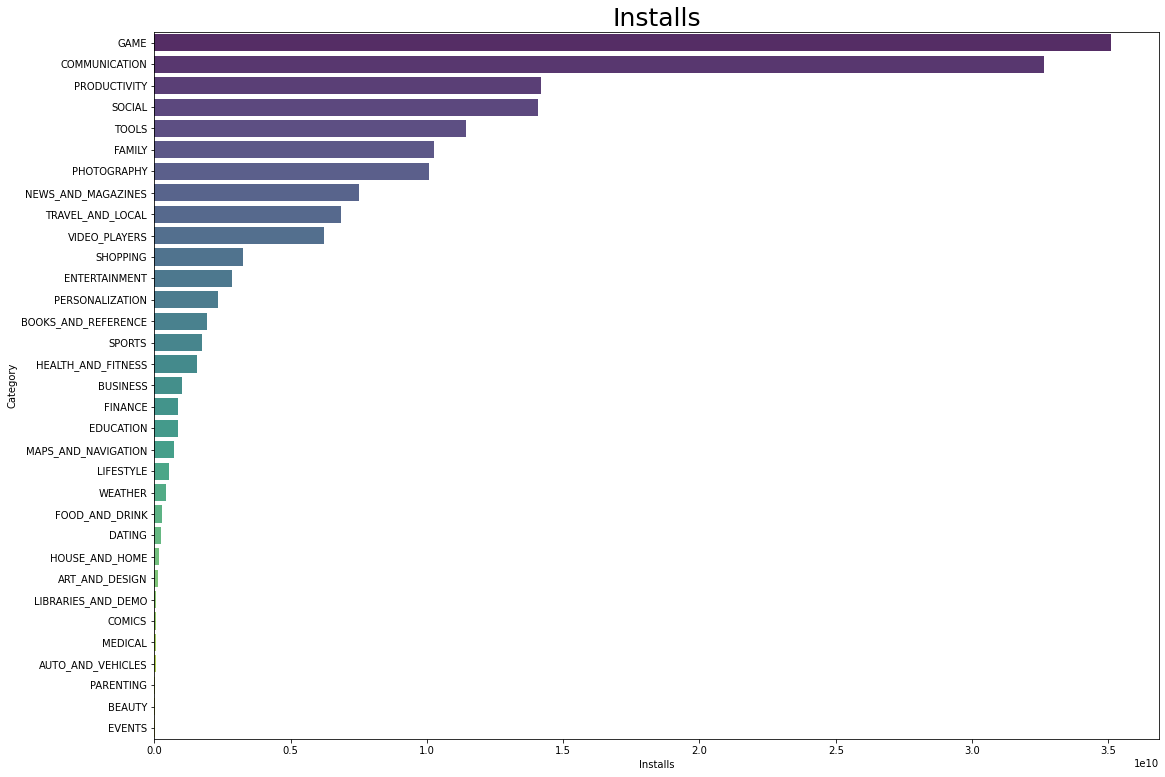

In [21]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
plt.title("Installs", fontsize = 25);

This tells us the category of apps that has the maximum number of installs. The Game, Communication, Productivity, and Tools categories has the highest number of installs compared to other categories of apps.

###What are the Top 10 installed apps in family categories?

In [22]:
group = data.groupby('Category')    
top_10 = group.get_group('FAMILY')  #Family Category.

In [23]:
top_10_app = top_10.sort_values(by='Installs', ascending=False).head(10)    #Top 10 installed apps in Family categories.

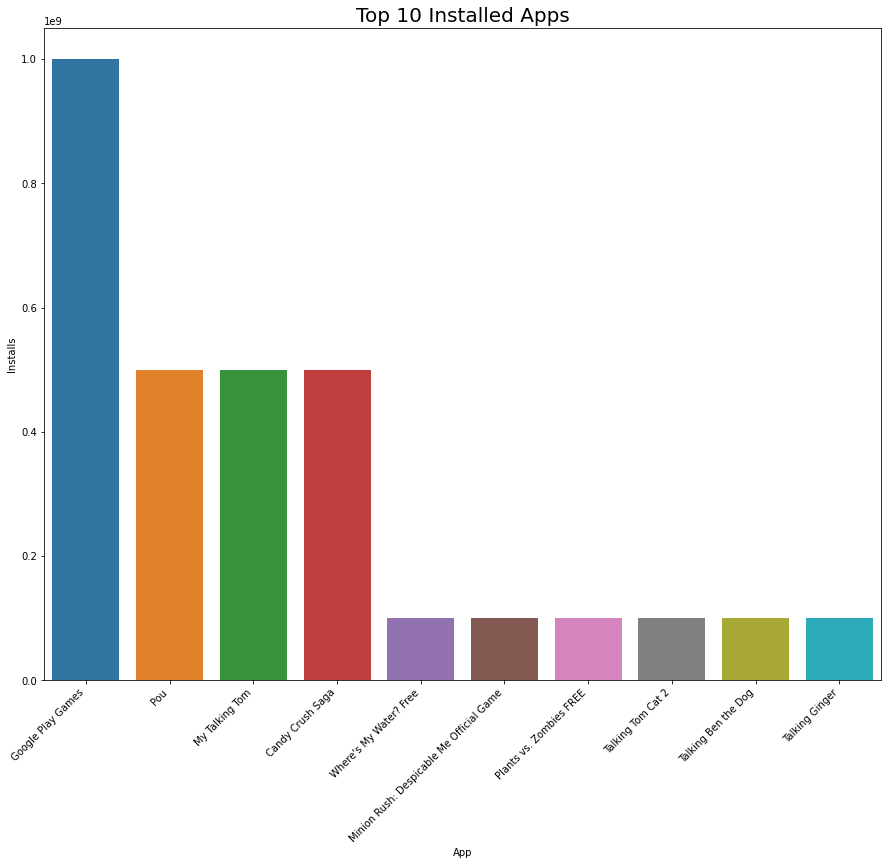

In [24]:
 plt.figure(figsize=(15,12))
 plt.title('Top 10 Installed Apps',size = 20);    
 graph = sns.barplot(x = top_10_app.App, y = top_10_app.Installs)
 graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

From this graph we can see that in the family category Google Pay Games, Pou, and My Talking Tom has the highest intalls.

###Which are the top expensive Apps?

In [25]:
top10PaidApps = data[data['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

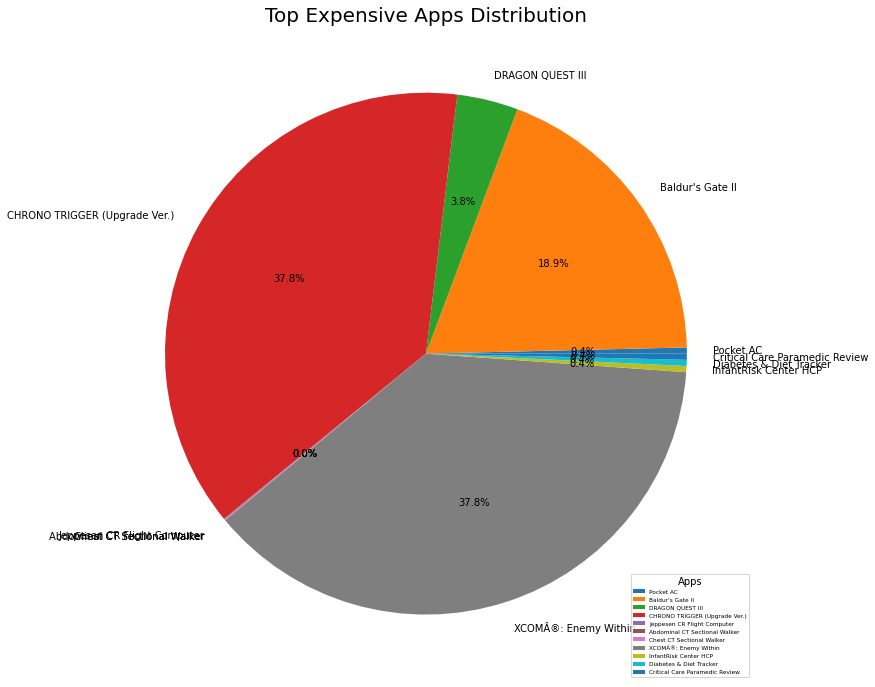

In [26]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps.Installs, explode=None, labels=top10PaidApps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

From the above graph, we can interpret that the App Chrono Trigger and XCOMA: Enemy Unknown are the most expensive app in the google play store followed by Baldur's Gate.

###Which are the Apps with the highest number of reviews?

In [27]:
Apps_with_Highest_rev = data.sort_values(by='Reviews', ascending=False).head(10)    #Apps with the highest number of reviews.

Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,1000000,Free,0,Everyone,Sports,"May 23, 2018"
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,100000,Free,0,Everyone,Tools,"December 17, 2013"
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,1000000,Free,0,Everyone,Shopping,"January 22, 2018"
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,1000000,Free,0,Everyone,Shopping,"January 22, 2018"
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,1000000,Free,0,Everyone,Sports,"June 5, 2018"
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,500000,Free,0,Teen,Travel & Local,"August 6, 2018"
3049,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,1000000,Free,0,Everyone,Sports,"June 5, 2018"
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,Varies with device,100000,Free,0,Everyone,Entertainment,"June 27, 2018"
6724,BSPlayer ARMv7 VFP CPU support,VIDEO_PLAYERS,4.3,9966,5.5M,1000000,Free,0,Everyone,Video Players & Editors,"March 31, 2017"
7982,"Easy Resume Builder, Resume help, Curriculum v...",TOOLS,4.3,996,10M,50000,Free,0,Everyone,Tools,"September 28, 2017"


###Count of Apps found in different genres?

In [28]:
topAppsinGenres = data['Genres'].value_counts().head(50)

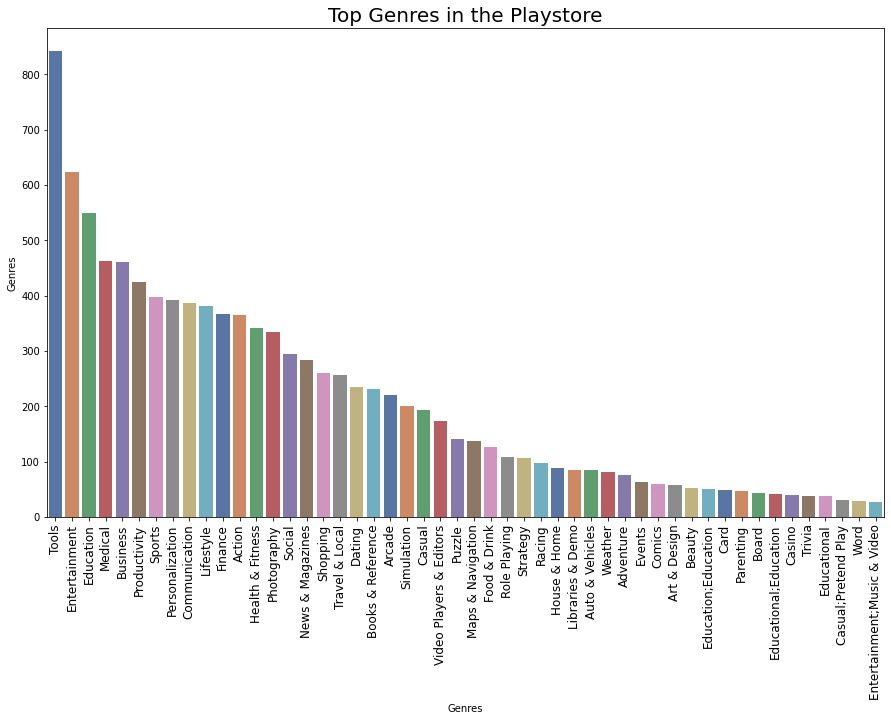

In [29]:
plt.figure(figsize=(15,9))
plt.xlabel('Genres')
plt.ylabel('Genres(App Count)')
graph = sns.barplot(x=topAppsinGenres.index,y=topAppsinGenres,palette="deep")     #let’s define our x and y axis, which will be required for plotting the graph.
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

From the above visualization, we can see that the Highest Number of Apps found in the Tools and Entertainment genres followed by Education, Medical and many more.

###lowest Installed Apps in Education Category

In [33]:
group2 = data.groupby('Category')
lowest = group2.get_group('EDUCATION')     #Education Category.

In [34]:
lowest_app = lowest.sort_values(by='Installs', ascending=True).head(10) 

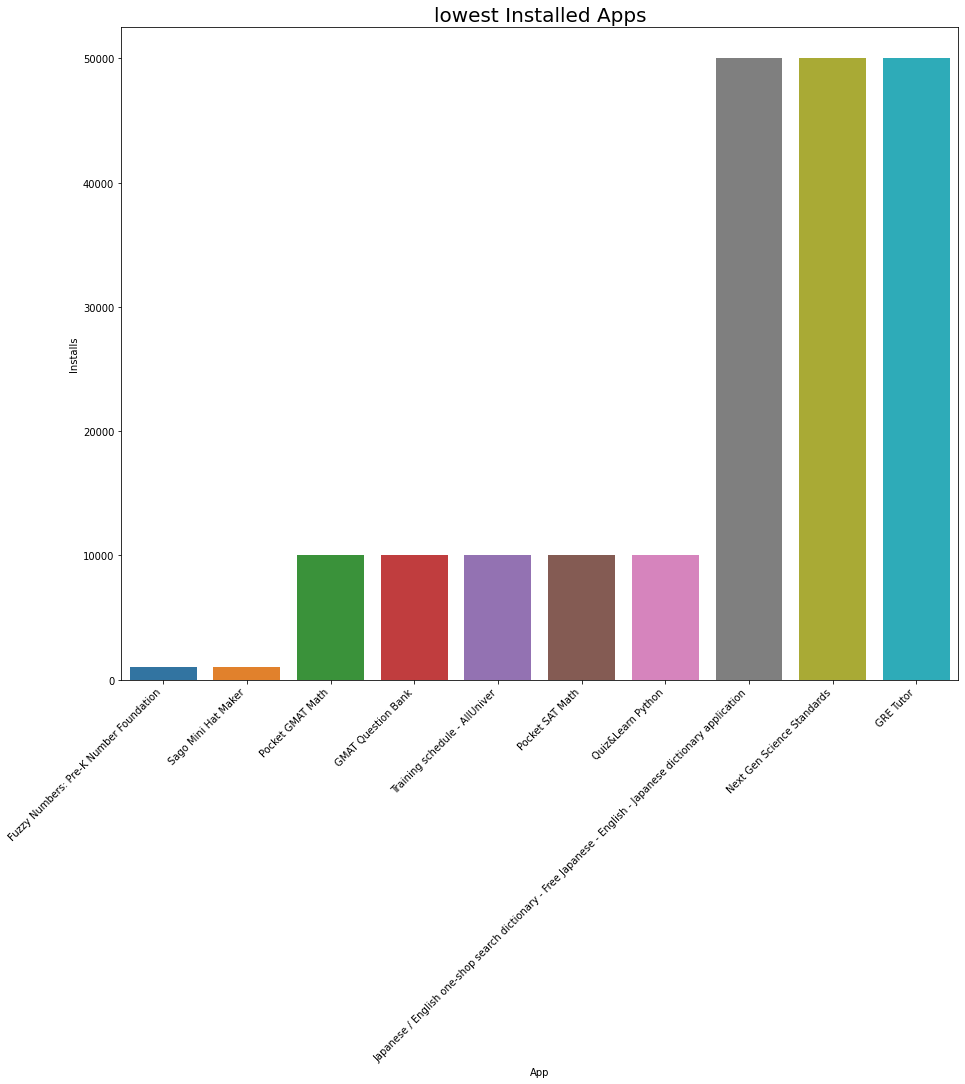

In [35]:
 plt.figure(figsize=(15,12))
 plt.title('lowest Installed Apps',size = 20);    
 graph = sns.barplot(x = lowest_app.App, y = lowest_app.Installs)
 graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

From this above plot, we can See that in Education category Fuzzy Number and Sago Mini Hat Maker are the lowest installed app. GRE Tutor and Next Gen Science Standards are the highest installed app.

###Percent of Free Vs Paid Apps in Education Category

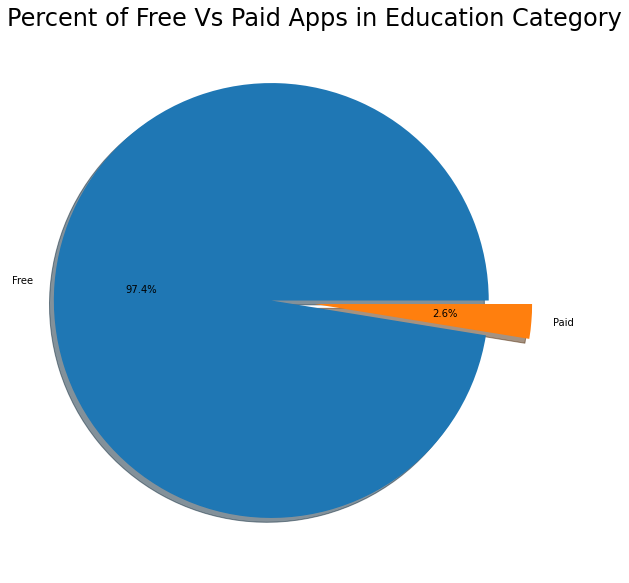

In [36]:
plt.figure(figsize=(10,10))                                        #Free Vs Paid Apps in Education Category.
labels_2 = lowest['Type'].value_counts(sort = True).index
sizes = lowest['Type'].value_counts(sort = True)
myexplode_2 = [0.2, 0]
plt.pie(sizes,  labels=labels_2, explode = myexplode_2, autopct='%1.1f%%', shadow=True)
plt.title('Percent of Free Vs Paid Apps in Education Category', size = 24);

From this above graph, we can see that 97%(Approx.) of apps in Education category are free and 3%(Approx.) are paid.

###Entertainment Content for Different Age Groups.

In [37]:
group3 = data.groupby('Category')
content = group3.get_group('ENTERTAINMENT')                            #Entertainment Category.
content_rating =  content['Content Rating'].value_counts().head(50)
content_rating

Teen            96
Everyone        39
Mature 17+       9
Everyone 10+     5
Name: Content Rating, dtype: int64

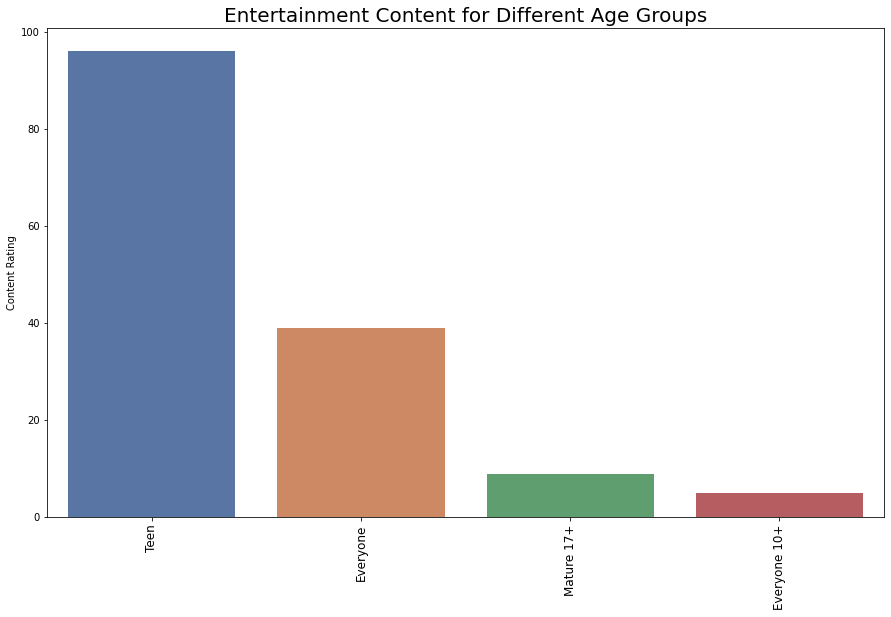

In [38]:
plt.figure(figsize=(15,9))
graph = sns.barplot(x=content_rating.index,y=content_rating,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Entertainment Content for Different Age Groups", fontsize = 20);

From this above graph, we can see that there are lots of Entertainment Apps for Teen category as compare to Everyone 10+ category. so we can make Entertainment Apps for Everyone 10+ category also for engage more users.